In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
temp= df.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
df['quarter'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

C:\Users\Dell\AppData\Local\Temp/ipykernel_9028/758400630.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp= df.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [5]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quarter  42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [7]:
df.drop('Quarter',axis=1,inplace=True)

In [8]:
df.head()

,Sales,quarter
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987


In [9]:
df['quarter']=pd.to_datetime(df['quarter'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Sales    42 non-null     float64       
 1   quarter  42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


In [11]:
df.set_index('quarter',inplace=True)

In [12]:
df.head()

,Sales
quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


<AxesSubplot:xlabel='quarter'>

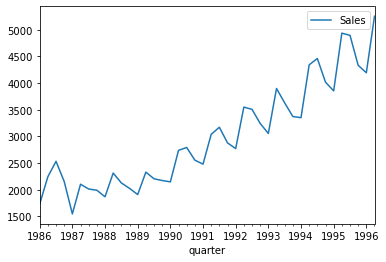

In [13]:
df.plot()

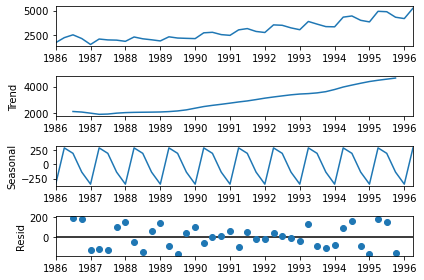

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df,model='additive',period=4).plot();

In [16]:
df.shape

(42, 1)

In [17]:
train=df.head(34)
test=df.tail(8)

In [18]:
train

,Sales
quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


In [19]:
test

,Sales
quarter,
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0
1995-04-01,4936.0
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.Sales,trend='add', seasonal='mul').fit()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
test_pred=hwmodel.forecast(8)
test_pred

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1994-07-01    4215.121510
1994-10-01    3869.493970
1995-01-01    3620.133255
1995-04-01    4579.126709
1995-07-01    4466.455905
1995-10-01    4096.830840
1996-01-01    3829.741246
1996-04-01    4840.477923
Freq: QS-OCT, dtype: float64

In [27]:
test

,Sales
quarter,
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0
1995-04-01,4936.0
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


<AxesSubplot:xlabel='quarter'>

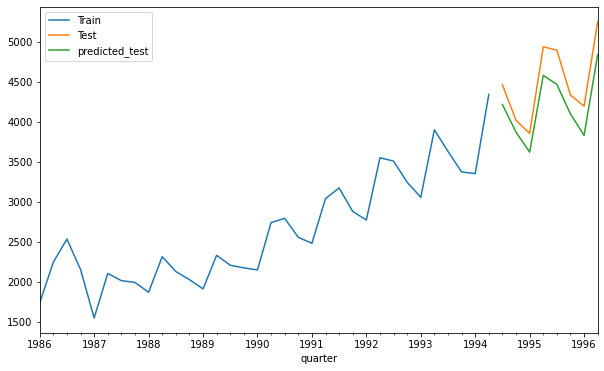

In [28]:
train['Sales'].plot(legend=True, label='Train', figsize=(10,6))
test['Sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

In [29]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred))

317.5199360760032

In [34]:
final_model=ExponentialSmoothing(df.Sales,trend='add', seasonal='mul').fit()
pred=final_model.forecast(8)
pred

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1996-07-01    5216.190079
1996-10-01    4663.475300
1997-01-01    4502.472863
1997-04-01    5731.036391
1997-07-01    5613.076244
1997-10-01    5011.683296
1998-01-01    4832.498764
1998-04-01    6143.555251
Freq: QS-OCT, dtype: float64

<AxesSubplot:xlabel='quarter'>

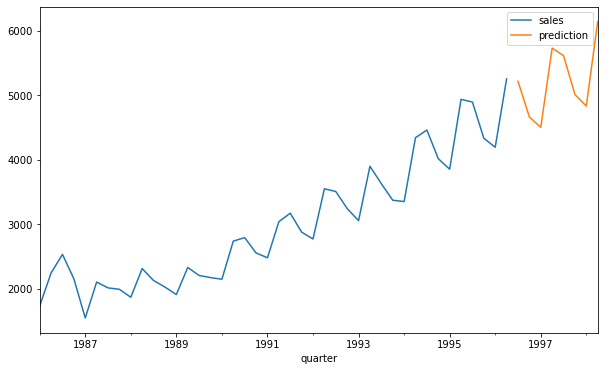

In [35]:
df['Sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')